In [428]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from safetensors import torch


In [429]:
dataset=pd.read_excel("Customer-Churn.xlsx",sheet_name="Table1")
dataset

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure group
0,5583-SXDAG,Male,0,Yes,No,1,Yes,Fiber optic,No,No,...,No,No,No,Month-to-month,No,Electronic check,70.00,70.00,Yes,0-12 Months
1,0021-IKXGC,Female,1,No,No,1,Yes,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,72.10,72.10,No,0-12 Months
2,1452-VOQCH,Male,0,No,No,1,Yes,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,75.10,75.10,No,0-12 Months
3,1820-TQVEV,Male,0,No,No,1,Yes,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,69.55,69.55,Yes,0-12 Months
4,6513-EECDB,Male,1,Yes,No,1,Yes,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,73.55,73.55,Yes,0-12 Months
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,1956-YIFGE,Male,0,Yes,Yes,22,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,One year,Yes,Mailed check,100.05,2090.25,No,13-24 Months
7028,8213-TAZPM,Female,0,Yes,Yes,69,Yes,Fiber optic,No,Yes,...,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),108.75,7493.05,No,+25 Months
7029,6664-FPDAC,Female,1,No,No,56,Yes,Fiber optic,No,Yes,...,Yes,Yes,Yes,One year,Yes,Electronic check,111.95,6418.90,Yes,+25 Months
7030,7203-OYKCT,Male,0,No,No,72,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,One year,Yes,Electronic check,104.95,7544.30,No,+25 Months


In [430]:
dataset.isnull().sum().sum()


0

In [431]:
tenures_group2 =dataset.loc[:,['tenure','tenure group']]
tenures_group2

,tenure,tenure group
0,1,0-12 Months
1,1,0-12 Months
2,1,0-12 Months
3,1,0-12 Months
4,1,0-12 Months
...,...,...
7027,22,13-24 Months
7028,69,+25 Months
7029,56,+25 Months
7030,72,+25 Months


In [432]:
customers=dataset.loc[:,'customerID':'InternetService']
customers.drop("tenure",axis=1,inplace=True)
customers

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,InternetService
0,5583-SXDAG,Male,0,Yes,No,Yes,Fiber optic
1,0021-IKXGC,Female,1,No,No,Yes,Fiber optic
2,1452-VOQCH,Male,0,No,No,Yes,Fiber optic
3,1820-TQVEV,Male,0,No,No,Yes,Fiber optic
4,6513-EECDB,Male,1,Yes,No,Yes,Fiber optic
...,...,...,...,...,...,...,...
7027,1956-YIFGE,Male,0,Yes,Yes,Yes,Fiber optic
7028,8213-TAZPM,Female,0,Yes,Yes,Yes,Fiber optic
7029,6664-FPDAC,Female,1,No,No,Yes,Fiber optic
7030,7203-OYKCT,Male,0,No,No,Yes,Fiber optic


In [433]:
customers.insert(7,'Contract',dataset['Contract'])
customers.insert(8,'PaperlessBilling',dataset['PaperlessBilling'])
customers.insert(9, 'PaymentMethod', dataset['PaymentMethod'])
customers


,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,InternetService,Contract,PaperlessBilling,PaymentMethod
0,5583-SXDAG,Male,0,Yes,No,Yes,Fiber optic,Month-to-month,No,Electronic check
1,0021-IKXGC,Female,1,No,No,Yes,Fiber optic,Month-to-month,Yes,Electronic check
2,1452-VOQCH,Male,0,No,No,Yes,Fiber optic,Month-to-month,Yes,Electronic check
3,1820-TQVEV,Male,0,No,No,Yes,Fiber optic,Month-to-month,Yes,Electronic check
4,6513-EECDB,Male,1,Yes,No,Yes,Fiber optic,Month-to-month,Yes,Electronic check
...,...,...,...,...,...,...,...,...,...,...
7027,1956-YIFGE,Male,0,Yes,Yes,Yes,Fiber optic,One year,Yes,Mailed check
7028,8213-TAZPM,Female,0,Yes,Yes,Yes,Fiber optic,One year,Yes,Bank transfer (automatic)
7029,6664-FPDAC,Female,1,No,No,Yes,Fiber optic,One year,Yes,Electronic check
7030,7203-OYKCT,Male,0,No,No,Yes,Fiber optic,One year,Yes,Electronic check


In [434]:
charges=dataset.loc[:,['customerID','MonthlyCharges','TotalCharges','Churn']]
charges


,customerID,MonthlyCharges,TotalCharges,Churn
0,5583-SXDAG,70.00,70.00,Yes
1,0021-IKXGC,72.10,72.10,No
2,1452-VOQCH,75.10,75.10,No
3,1820-TQVEV,69.55,69.55,Yes
4,6513-EECDB,73.55,73.55,Yes
...,...,...,...,...
7027,1956-YIFGE,100.05,2090.25,No
7028,8213-TAZPM,108.75,7493.05,No
7029,6664-FPDAC,111.95,6418.90,Yes
7030,7203-OYKCT,104.95,7544.30,No


In [435]:
tenures=dataset.loc[:,['customerID','tenure','tenure group']]
tenures

,customerID,tenure,tenure group
0,5583-SXDAG,1,0-12 Months
1,0021-IKXGC,1,0-12 Months
2,1452-VOQCH,1,0-12 Months
3,1820-TQVEV,1,0-12 Months
4,6513-EECDB,1,0-12 Months
...,...,...,...
7027,1956-YIFGE,22,13-24 Months
7028,8213-TAZPM,69,+25 Months
7029,6664-FPDAC,56,+25 Months
7030,7203-OYKCT,72,+25 Months


In [436]:
services = dataset.loc[:, ['customerID', 'OnlineSecurity','OnlineBackup', 'StreamingTV','StreamingMovies']]
services

,customerID,OnlineSecurity,OnlineBackup,StreamingTV,StreamingMovies
0,5583-SXDAG,No,No,No,No
1,0021-IKXGC,No,No,No,No
2,1452-VOQCH,No,No,No,No
3,1820-TQVEV,No,No,No,No
4,6513-EECDB,No,No,No,No
...,...,...,...,...,...
7027,1956-YIFGE,No,Yes,Yes,Yes
7028,8213-TAZPM,No,Yes,Yes,Yes
7029,6664-FPDAC,No,Yes,Yes,Yes
7030,7203-OYKCT,No,Yes,Yes,Yes


In [437]:
#charges.to_excel("charges.xlsx")
#tenures.to_excel("tenures.xlsx")
#customers.to_excel("customers.xlsx")
#services.to_excel("services.xlsx")


In [438]:
charges

,customerID,MonthlyCharges,TotalCharges,Churn
0,5583-SXDAG,70.00,70.00,Yes
1,0021-IKXGC,72.10,72.10,No
2,1452-VOQCH,75.10,75.10,No
3,1820-TQVEV,69.55,69.55,Yes
4,6513-EECDB,73.55,73.55,Yes
...,...,...,...,...
7027,1956-YIFGE,100.05,2090.25,No
7028,8213-TAZPM,108.75,7493.05,No
7029,6664-FPDAC,111.95,6418.90,Yes
7030,7203-OYKCT,104.95,7544.30,No


In [439]:
customers

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,InternetService,Contract,PaperlessBilling,PaymentMethod
0,5583-SXDAG,Male,0,Yes,No,Yes,Fiber optic,Month-to-month,No,Electronic check
1,0021-IKXGC,Female,1,No,No,Yes,Fiber optic,Month-to-month,Yes,Electronic check
2,1452-VOQCH,Male,0,No,No,Yes,Fiber optic,Month-to-month,Yes,Electronic check
3,1820-TQVEV,Male,0,No,No,Yes,Fiber optic,Month-to-month,Yes,Electronic check
4,6513-EECDB,Male,1,Yes,No,Yes,Fiber optic,Month-to-month,Yes,Electronic check
...,...,...,...,...,...,...,...,...,...,...
7027,1956-YIFGE,Male,0,Yes,Yes,Yes,Fiber optic,One year,Yes,Mailed check
7028,8213-TAZPM,Female,0,Yes,Yes,Yes,Fiber optic,One year,Yes,Bank transfer (automatic)
7029,6664-FPDAC,Female,1,No,No,Yes,Fiber optic,One year,Yes,Electronic check
7030,7203-OYKCT,Male,0,No,No,Yes,Fiber optic,One year,Yes,Electronic check


# Encoding

In [440]:
from sklearn.preprocessing import LabelEncoder

charges_copy=charges.copy()

label_encoders={}

for column in charges.columns:
    le=LabelEncoder()
    charges_copy[column]=le.fit_transform(charges[column])
    label_encoders[column]=le
    



In [441]:
charges_copy.drop('customerID',axis=1,inplace=True)
charges_copy.describe()

,MonthlyCharges,TotalCharges,Churn
count,7032.000000,7032.000000,7032.000000
mean,683.446815,3100.980518,0.265785
std,478.099359,1942.759881,0.441782
min,0.000000,0.000000,0.000000
25%,200.750000,1379.750000,0.000000
50%,721.000000,3064.500000,0.000000
75%,1089.250000,4782.250000,1.000000
max,1583.000000,6529.000000,1.000000


## Using Min max scaling to ensure values between 0 and 1 

In [442]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
charges_copy[['MonthlyCharges','TotalCharges']]=min_max.fit_transform(charges_copy[['MonthlyCharges','TotalCharges']])
charges_copy.describe()

,MonthlyCharges,TotalCharges,Churn
count,7032.000000,7032.000000,7032.000000
mean,0.431742,0.474955,0.265785
std,0.302021,0.297559,0.441782
min,0.000000,0.000000,0.000000
25%,0.126816,0.211326,0.000000
50%,0.455464,0.469367,0.000000
75%,0.688092,0.732463,1.000000
max,1.000000,1.000000,1.000000


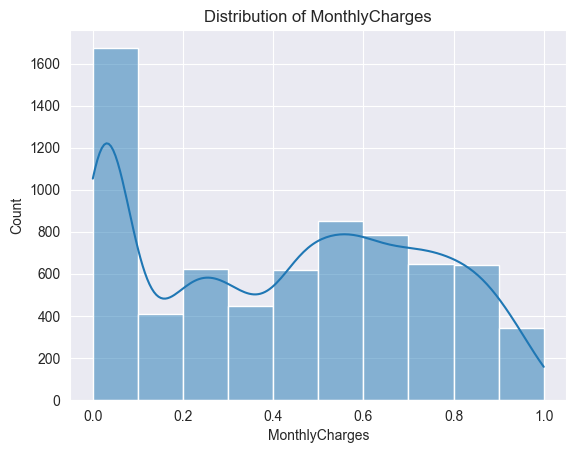

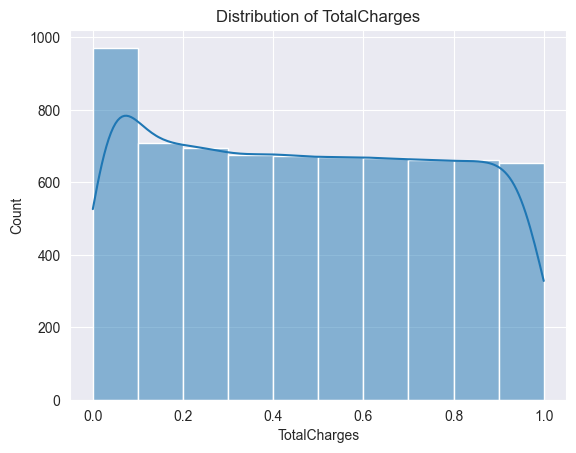

In [443]:
for col in ['MonthlyCharges', 'TotalCharges']:
    sns.histplot(charges_copy[col], bins=10, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()
    

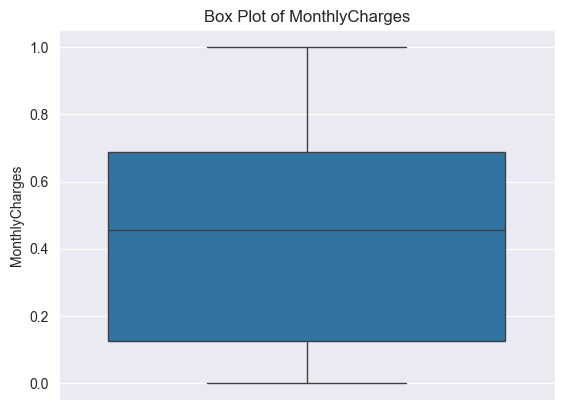

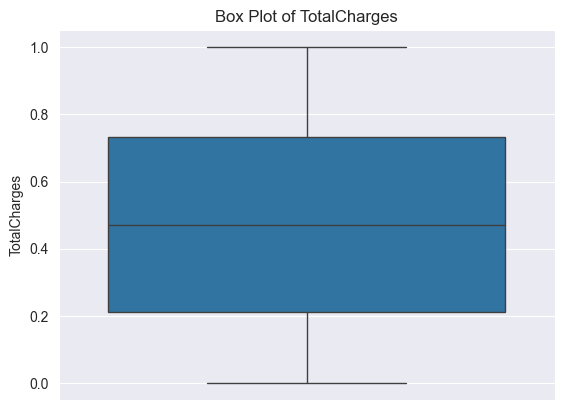

In [444]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in ['MonthlyCharges', 'TotalCharges']:
    sns.boxplot(data=charges_copy[col])
    plt.title(f'Box Plot of {col}')
    plt.show()


## so from box plot visualization their is no outliers and also check if their any outliers found


In [445]:
for col in ['MonthlyCharges', 'TotalCharges']:
    Q1 = charges_copy[col].quantile(0.25)
    Q3 = charges_copy[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count the outliers
    outliers = charges_copy[(charges_copy[col] < lower_bound) | (charges_copy[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers found")


MonthlyCharges: 0 outliers found
TotalCharges: 0 outliers found


In [446]:
from sklearn.preprocessing import  OneHotEncoder
tenures_group=tenures['tenure group']
tenures_group=tenures_group.values.reshape(-1,1)
one_hot_encoder=OneHotEncoder(sparse_output=False)
columns=['0-12 Months','13-24 Months','+25']
tenures_group=one_hot_encoder.fit_transform(tenures_group)
tenures_group=pd.DataFrame(tenures_group,columns=columns)
tenures_group

,0-12 Months,13-24 Months,+25
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
...,...,...,...
7027,0.0,0.0,1.0
7028,1.0,0.0,0.0
7029,1.0,0.0,0.0
7030,1.0,0.0,0.0


In [447]:
tenures

,customerID,tenure,tenure group
0,5583-SXDAG,1,0-12 Months
1,0021-IKXGC,1,0-12 Months
2,1452-VOQCH,1,0-12 Months
3,1820-TQVEV,1,0-12 Months
4,6513-EECDB,1,0-12 Months
...,...,...,...
7027,1956-YIFGE,22,13-24 Months
7028,8213-TAZPM,69,+25 Months
7029,6664-FPDAC,56,+25 Months
7030,7203-OYKCT,72,+25 Months


In [448]:
tenures["tenure ID"]=[i for i in range(1,tenures.shape[0]+1)]
tenures

,customerID,tenure,tenure group,tenure ID
0,5583-SXDAG,1,0-12 Months,1
1,0021-IKXGC,1,0-12 Months,2
2,1452-VOQCH,1,0-12 Months,3
3,1820-TQVEV,1,0-12 Months,4
4,6513-EECDB,1,0-12 Months,5
...,...,...,...,...
7027,1956-YIFGE,22,13-24 Months,7028
7028,8213-TAZPM,69,+25 Months,7029
7029,6664-FPDAC,56,+25 Months,7030
7030,7203-OYKCT,72,+25 Months,7031


## Connecting Data with SQL server

In [449]:
tenures_group2["tenure ID"]=[i for i in range(1,tenures.shape[0]+1)]
tenures_group2

,tenure,tenure group,tenure ID
0,1,0-12 Months,1
1,1,0-12 Months,2
2,1,0-12 Months,3
3,1,0-12 Months,4
4,1,0-12 Months,5
...,...,...,...
7027,22,13-24 Months,7028
7028,69,+25 Months,7029
7029,56,+25 Months,7030
7030,72,+25 Months,7031


In [450]:
from sqlalchemy import create_engine

# Define connection string
conn_str = (
    r'DRIVER={ODBC Driver 17 for SQL Server};'
    r'SERVER=SH;'      
    r'DATABASE=Churn;'  
    r'Trusted_Connection=yes;'       
)
engine = create_engine(f"mssql+pyodbc:///?odbc_connect={conn_str}")

In [451]:
# Upload DataFrames to SQL Server
try:
 charges.to_sql('Charges',con=engine, if_exists='fail', index=False)
except ValueError as e:
    print(f"Table already exists: {e}")
try:    
 services.to_sql('Services',con=engine, if_exists='fail', index=False)
except ValueError as e:
    print(f"Table already exists: {e}")
try:
 customers.to_sql('Customers',con=engine, if_exists='fail', index=False)
except ValueError as e:
    print(f"Table already exists: {e}")


Table already exists: Table 'Charges' already exists.
Table already exists: Table 'Services' already exists.
Table already exists: Table 'Customers' already exists.


In [452]:
try:
 tenures.to_sql('Tenure',con=engine, if_exists='fail', index=False)
except ValueError as e:
    print(f"Table already exists: {e}")
try: 
 tenures_group2.to_sql('Tenure Group',con=engine, if_exists='fail', index=False)
except ValueError as e:
    print(f"Table already exists: {e}")
    

Table already exists: Table 'Tenure' already exists.
Table already exists: Table 'Tenure Group' already exists.


##  Churn Analysis:

In [453]:
# 1-getting gender and its payment method by grouping on total charges
query="""
Select gender , paymentMethod , AVG(TotalCharges) as avg_total_charges 
from customers
JOIN charges ON customers.customerID = charges.customerID
Group by gender, paymentMethod
Order by gender;
"""
df_query=pd.read_sql_query(query,con=engine)
df_query

,gender,paymentMethod,avg_total_charges
0,Female,Electronic check,2017.955684
1,Female,Credit card (automatic),3112.704394
2,Female,Mailed check,1086.340387
3,Female,Bank transfer (automatic),3064.537802
4,Male,Credit card (automatic),3031.106948
5,Male,Mailed check,1024.702533
6,Male,Electronic check,2162.255314
7,Male,Bank transfer (automatic),3094.686954


In [454]:
#2- What is the churn rate by gender? Which payment method has the highest churn rate?

query="""
SELECT paymentMethod,
       COUNT(*) AS Total_Customers,
       gender,
       SUM(CASE WHEN churn = 'No' THEN 0 ELSE 1 END) AS Churned_Customers,
       CASE 
           WHEN COUNT(*) = 0 THEN 0  -- Or NULL, or another appropriate value
           ELSE (SUM(CASE WHEN churn = 'No' THEN 0 ELSE 1 END) * 100.0) / COUNT(*) 
       END AS churn_rate
FROM customers
JOIN charges ON customers.customerID = charges.customerID
GROUP BY paymentMethod, gender
ORDER BY churn_rate DESC;
"""
df_query=pd.read_sql_query(query,con=engine)
df_query

,paymentMethod,Total_Customers,gender,Churned_Customers,churn_rate
0,Electronic check,1195,Male,549,45.941423
1,Electronic check,1170,Female,522,44.615385
2,Mailed check,775,Female,150,19.354839
3,Mailed check,829,Male,158,19.059107
4,Credit card (automatic),751,Female,131,17.443409
5,Bank transfer (automatic),787,Female,136,17.280813
6,Bank transfer (automatic),755,Male,122,16.158940
7,Credit card (automatic),770,Male,101,13.116883


##  Customer Segmentation

In [455]:
# 3-What is the average total charges for customers with and without online security?
query="""
SELECT AVG(ch.TotalCharges) AS avg_total_charges, s.OnlineSecurity
FROM customers c
JOIN charges ch ON c.customerID = ch.customerID
JOIN Services s ON c.customerID = s.customerID
GROUP BY s.OnlineSecurity;
"""
df_query=pd.read_sql_query(query,con=engine)
df_query


,avg_total_charges,OnlineSecurity
0,3759.042109,Yes
1,665.220329,No internet service
2,2136.277938,No


In [456]:
# 4-How does the streaming service usage (StreamingTV, StreamingMovies) impact customer retention?

query="""
SELECT s.StreamingTV,s.StreamingMovies,COUNT(*) as Total_customers,
SUM(CASE when Churn='No' Then 1 ELSE 0 END) AS Returned_customers,
(SUM(CASE when Churn='No' Then 1 ELSE 0 END)*1.0/COUNT(*) )*100 as Retention_rate 
FROM customers c
JOIN charges ch ON c.customerID = ch.customerID
JOIN Services s ON c.customerID = s.customerID
GROUP BY StreamingTV,StreamingMovies
ORDER BY Retention_rate  DESC;
"""
df_query=pd.read_sql_query(query,con=engine)
df_query

,StreamingTV,StreamingMovies,Total_customers,Returned_customers,Retention_rate
0,No internet service,No internet service,1520,1407,92.565789
1,Yes,Yes,1939,1368,70.551831
2,No,Yes,792,545,68.813131
3,Yes,No,764,521,68.193717
4,No,No,2017,1322,65.542885


# Payment Method Analysis:

In [457]:
# 5-Which payment method is most popular among senior citizens?
query="""
SELECT paymentMethod, COUNT(*) AS num_senior_citizens
FROM customers
WHERE SeniorCitizen = 1  -- Assuming 1 represents senior citizens, 0 otherwise
GROUP BY paymentMethod
ORDER BY num_senior_citizens DESC

"""
df_query=pd.read_sql_query(query,con=engine)
df_query

,paymentMethod,num_senior_citizens
0,Electronic check,594
1,Bank transfer (automatic),233
2,Credit card (automatic),221
3,Mailed check,94


In [458]:
# 6-What is the average total charges for customers using electronic checks vs. credit cards?

query="""
SELECT 
    PaymentMethod, 
    AVG(TotalCharges) AS avg_total_charges 
FROM 
    customers,charges 
WHERE 
    PaymentMethod IN ('Electronic check', 'Credit card (automatic)') 
GROUP BY 
    PaymentMethod 
ORDER BY 
    avg_total_charges DESC;
"""
df_query=pd.read_sql_query(query,con=engine)
df_query

,PaymentMethod,avg_total_charges
0,Credit card (automatic),2283.300441
1,Electronic check,2283.300441


In [459]:
# 7-What is the average monthly revenue by contract type (Month-to-Month, One Year, Two Year)?

query="""SELECT 
    Contract, 
    AVG(MonthlyCharges) AS avg_monthly_revenue 
FROM 
    customers ,charges 
GROUP BY 
    Contract 
ORDER BY 
    avg_monthly_revenue DESC;
"""
df_query=pd.read_sql_query(query,con=engine)
df_query

,Contract,avg_monthly_revenue
0,Month-to-month,64.798208
1,Two year,64.798208
2,One year,64.798208


In [460]:
charges_copy['PaymentMethod']=customers['PaymentMethod']
charges_copy['PaymentMethod']=le.fit_transform(customers['PaymentMethod'])
charges_copy

,MonthlyCharges,TotalCharges,Churn,PaymentMethod
0,0.451042,0.045336,1,2
1,0.476311,0.049625,0,2
2,0.510423,0.053301,0,2
3,0.445357,0.043958,1,2
4,0.490840,0.050697,1,2
...,...,...,...,...
7027,0.809223,0.578802,0,3
7028,0.912192,0.970286,0,0
7029,0.948831,0.919590,1,2
7030,0.867340,0.972278,0,2


In [461]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
X=charges_copy.drop(columns=['Churn'])
Y=charges_copy['Churn']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
logreg=LogisticRegression()
logreg.fit(X_train, Y_train)
y_pred = logreg.predict(X_test)
print("Accuracy ",accuracy_score(Y_test, y_pred))
print("Classification Report",classification_report(Y_test, y_pred))
print("Confusion Matrix\n",confusion_matrix(Y_test, y_pred))

Accuracy  0.7974413646055437
Classification Report               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.47      0.55       371

    accuracy                           0.80      1407
   macro avg       0.75      0.69      0.71      1407
weighted avg       0.78      0.80      0.79      1407

Confusion Matrix
 [[946  90]
 [195 176]]


In [462]:
churn_prediction=pd.DataFrame({
    'MonthlyCharges':X_test['MonthlyCharges'],
    'TotalCharges':X_test['TotalCharges'],
    'PaymentMethod':X_test['PaymentMethod'],
     'True_Churn': Y_test,
    'Predicted_Churn': y_pred
})
churn_prediction

,MonthlyCharges,TotalCharges,PaymentMethod,True_Churn,Predicted_Churn
2476,0.246368,0.195283,3,0,0
6773,0.845231,0.795221,2,0,0
6116,0.747315,0.791239,0,0,0
3047,0.365130,0.659519,3,0,0
4092,0.120025,0.339562,0,0,0
...,...,...,...,...,...
1728,0.599495,0.419819,2,0,0
5241,0.714466,0.923112,0,0,0
5456,0.138345,0.645888,1,0,0
5842,0.047378,0.492725,0,0,0


In [463]:

churn_prediction['PaymentMethod'] = churn_prediction['PaymentMethod'].astype(int)
churn_prediction['PaymentMethod'] = churn_prediction['PaymentMethod'].replace(0, "Bank transfer (automatic)") 
churn_prediction['PaymentMethod'] = churn_prediction['PaymentMethod'].replace(1, "Credit card (automatic)")
churn_prediction['PaymentMethod'] = churn_prediction['PaymentMethod'].replace(2, "Electronic check")
churn_prediction['PaymentMethod'] = churn_prediction['PaymentMethod'].replace(3, "Mailed check")

churn_prediction['True_Churn'] = churn_prediction['True_Churn'].astype(int)
churn_prediction['True_Churn'] = churn_prediction['True_Churn'].replace(0, "No")
churn_prediction['True_Churn'] = churn_prediction['True_Churn'].replace(1, "Yes")
churn_prediction['Predicted_Churn'] = churn_prediction['Predicted_Churn'].replace(0, "No")
churn_prediction['Predicted_Churn'] = churn_prediction['Predicted_Churn'].replace(1, "Yes")

In [464]:
churn_prediction


,MonthlyCharges,TotalCharges,PaymentMethod,True_Churn,Predicted_Churn
2476,0.246368,0.195283,Mailed check,No,No
6773,0.845231,0.795221,Electronic check,No,No
6116,0.747315,0.791239,Bank transfer (automatic),No,No
3047,0.365130,0.659519,Mailed check,No,No
4092,0.120025,0.339562,Bank transfer (automatic),No,No
...,...,...,...,...,...
1728,0.599495,0.419819,Electronic check,No,No
5241,0.714466,0.923112,Bank transfer (automatic),No,No
5456,0.138345,0.645888,Credit card (automatic),No,No
5842,0.047378,0.492725,Bank transfer (automatic),No,No


In [465]:
#churn_prediction.to_excel('Charges_after_ML.xlsx')

In [466]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=10, random_state=42)
rf.fit(X_train, Y_train)
y_pred = rf.predict(X_test)
print("Accuracy ",accuracy_score(Y_test, y_pred))
print("Classification Report",classification_report(Y_test, y_pred))
print("Confusion Matrix\n",confusion_matrix(Y_test, y_pred))


Accuracy  0.751954513148543
Classification Report               precision    recall  f1-score   support

           0       0.81      0.87      0.84      1036
           1       0.54      0.43      0.48       371

    accuracy                           0.75      1407
   macro avg       0.67      0.65      0.66      1407
weighted avg       0.74      0.75      0.74      1407

Confusion Matrix
 [[900 136]
 [213 158]]


In [467]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
}

# Instantiate the GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the model with the best hyperparameters
grid_search.fit(X_train, Y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_score:.2f}")



'from sklearn.model_selection import GridSearchCV\n\n# Define the hyperparameters to tune\nparam_grid = {\n    \'n_estimators\': [100, 200, 300],\n    \'max_depth\': [None, 10, 20, 30],\n    \'min_samples_split\': [2, 5, 10],\n    \'min_samples_leaf\': [1, 2, 4],\n    \'max_features\': [\'auto\', \'sqrt\', \'log2\'],\n}\n\n# Instantiate the GridSearchCV\ngrid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)\n\n# Fit the model with the best hyperparameters\ngrid_search.fit(X_train, Y_train)\n\n# Get the best parameters and the best score\nbest_params = grid_search.best_params_\nbest_score = grid_search.best_score_\nprint(f"Best Parameters: {best_params}")\nprint(f"Best Cross-Validation Accuracy: {best_score:.2f}")\n'

In [468]:
X['Churn']=Y
X

,MonthlyCharges,TotalCharges,PaymentMethod,Churn
0,0.451042,0.045336,2,1
1,0.476311,0.049625,2,0
2,0.510423,0.053301,2,0
3,0.445357,0.043958,2,1
4,0.490840,0.050697,2,1
...,...,...,...,...
7027,0.809223,0.578802,3,0
7028,0.912192,0.970286,0,0
7029,0.948831,0.919590,2,1
7030,0.867340,0.972278,2,0


In [469]:
X['Churn']=le.inverse_transform(X['Churn'])
X

,MonthlyCharges,TotalCharges,PaymentMethod,Churn
0,0.451042,0.045336,2,Credit card (automatic)
1,0.476311,0.049625,2,Bank transfer (automatic)
2,0.510423,0.053301,2,Bank transfer (automatic)
3,0.445357,0.043958,2,Credit card (automatic)
4,0.490840,0.050697,2,Credit card (automatic)
...,...,...,...,...
7027,0.809223,0.578802,3,Bank transfer (automatic)
7028,0.912192,0.970286,0,Bank transfer (automatic)
7029,0.948831,0.919590,2,Credit card (automatic)
7030,0.867340,0.972278,2,Bank transfer (automatic)


In [470]:
#X.to_excel("Charges_after_ML.xlsx")

In [471]:
X=charges_copy.drop(columns=['Churn'])
X["0-12 Months"]=tenures_group["0-12 Months"]
X["13-24 Months"]=tenures_group["13-24 Months"]
X["+25"]=tenures_group["+25"]
Y=charges_copy['Churn']


# PCA

In [472]:
from sklearn.decomposition import PCA
pca_model = PCA(n_components = 5)
pca_data_standard = pca_model.fit_transform(X)
pca_data_standard

array([[ 0.70130198, -0.74573057, -0.28757184,  0.12809701, -0.1241362 ],
       [ 0.6989306 , -0.74091802, -0.28737168,  0.1521497 , -0.13117408],
       [ 0.6960244 , -0.73516056, -0.28716344,  0.18389032, -0.14249073],
       ...,
       [ 0.14584161,  0.84625149, -0.10568737,  0.47153013,  0.01055387],
       [ 0.14420012,  0.85400296, -0.10438266,  0.41695013,  0.09038697],
       [-0.79917113,  0.52585552, -0.09949713,  0.36392244,  0.08399454]])

In [473]:
dataset = pd.DataFrame(data = pca_data_standard, columns = ['PC1', 'PC2','PC3','PC4','PC5'])
dataset['target'] = Y
dataset.tail()

,PC1,PC2,PC3,PC4,PC5,target
7027,1.397587,0.293719,1.018206,0.485189,-0.001494,0
7028,-1.750306,0.213237,-0.094016,0.393297,0.050212,0
7029,0.145842,0.846251,-0.105687,0.471530,0.010554,1
7030,0.144200,0.854003,-0.104383,0.416950,0.090387,0
7031,-0.799171,0.525856,-0.099497,0.363922,0.083995,0


In [474]:
loadings = pd.DataFrame(pca_model.components_.T, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'], index=X.columns) 
for i in loadings.columns:
 print(f"Loadings for {i}:") 
 print(loadings[i])

Loadings for PC1:
MonthlyCharges   -0.070146
TotalCharges     -0.139648
PaymentMethod     0.945819
0-12 Months      -0.215666
13-24 Months      0.182789
+25               0.032877
Name: PC1, dtype: float64
Loadings for PC2:
MonthlyCharges    0.131079
TotalCharges      0.349856
PaymentMethod     0.322974
0-12 Months       0.652950
13-24 Months     -0.567920
+25              -0.085031
Name: PC2, dtype: float64
Loadings for PC3:
MonthlyCharges    0.002945
TotalCharges      0.029318
PaymentMethod    -0.005146
0-12 Months      -0.328219
13-24 Months     -0.483005
+25               0.811224
Name: PC3, dtype: float64
Loadings for PC4:
MonthlyCharges    0.893227
TotalCharges      0.345616
PaymentMethod     0.031514
0-12 Months      -0.209330
13-24 Months      0.194032
+25               0.015299
Name: PC4, dtype: float64
Loadings for PC5:
MonthlyCharges   -0.424304
TotalCharges      0.858947
PaymentMethod     0.009717
0-12 Months      -0.205583
13-24 Months      0.199450
+25               0.006

In [475]:
labels = ['0-12 Months', '+25', 'MonthlyCharges', 'TotalCharges']

In [476]:
print(f"Explanied variance ratio {pca_model.explained_variance_ratio_}")


Explanied variance ratio [0.64456447 0.20515876 0.09590319 0.05080061 0.00357297]


In [477]:
X.drop(columns='13-24 Months', inplace=True)
X

,MonthlyCharges,TotalCharges,PaymentMethod,0-12 Months,+25
0,0.451042,0.045336,2,0.0,0.0
1,0.476311,0.049625,2,0.0,0.0
2,0.510423,0.053301,2,0.0,0.0
3,0.445357,0.043958,2,0.0,0.0
4,0.490840,0.050697,2,0.0,0.0
...,...,...,...,...,...
7027,0.809223,0.578802,3,0.0,1.0
7028,0.912192,0.970286,0,1.0,0.0
7029,0.948831,0.919590,2,1.0,0.0
7030,0.867340,0.972278,2,1.0,0.0


In [478]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
Y=charges_copy['Churn']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
logreg=LogisticRegression()
logreg.fit(X_train, Y_train)
y_pred = logreg.predict(X_test)
print("Accuracy ",accuracy_score(Y_test, y_pred))
print("Classification Report",classification_report(Y_test, y_pred))
print("Confusion Matrix\n",confusion_matrix(Y_test, y_pred))

Accuracy  0.7981520966595593
Classification Report               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.48      0.55       371

    accuracy                           0.80      1407
   macro avg       0.75      0.70      0.71      1407
weighted avg       0.79      0.80      0.79      1407

Confusion Matrix
 [[946  90]
 [194 177]]


In [479]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=10, random_state=42)
rf.fit(X_train, Y_train)
Y_pred = rf.predict(X_test)
print("Accuracy ",accuracy_score(Y_test, Y_pred))
print("Classification Report",classification_report(Y_test, y_pred))
print("Confusion Matrix\n",confusion_matrix(Y_test, y_pred))

Accuracy  0.7633262260127932
Classification Report               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.48      0.55       371

    accuracy                           0.80      1407
   macro avg       0.75      0.70      0.71      1407
weighted avg       0.79      0.80      0.79      1407

Confusion Matrix
 [[946  90]
 [194 177]]


## so tenure group doesn't have a high importance on churn rate as it also give a prediction accuracy of 79 % , so we can take prediction of charge table only

In [480]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
X=charges_copy[['MonthlyCharges']]
Y=charges_copy['TotalCharges']
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X, Y, test_size=0.2, random_state=42)
linear=LinearRegression()
linear.fit(X_train1, Y_train1)
Y_pred = linear.predict(X_test1)
#print("Accuracy ",accuracy_score(Y_test1, y_pred))
#print("Classification Report",classification_report(Y_test1, y_pred))
#print("Confusion Matrix\n",confusion_matrix(Y_test1, y_pred))
mse=mean_squared_error(Y_test1, Y_pred)
print("Mean Squared Error",mse)

Mean Squared Error 0.0553230726876798


In [481]:
charges_copy.describe()

,MonthlyCharges,TotalCharges,Churn,PaymentMethod
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.431742,0.474955,0.265785,1.573237
std,0.302021,0.297559,0.441782,1.067504
min,0.000000,0.000000,0.000000,0.000000
25%,0.126816,0.211326,0.000000,1.000000
50%,0.455464,0.469367,0.000000,2.000000
75%,0.688092,0.732463,1.000000,2.000000
max,1.000000,1.000000,1.000000,3.000000


In [482]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
X=charges_copy[['MonthlyCharges','PaymentMethod']]
Y=charges_copy['TotalCharges']
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X, Y, test_size=0.2, random_state=42)
linear=LinearRegression()
linear.fit(X_train1, Y_train1)
Y_pred = linear.predict(X_test1)
#print("Accuracy ",accuracy_score(Y_test1, y_pred))
#print("Classification Report",classification_report(Y_test1, y_pred))
#print("Confusion Matrix\n",confusion_matrix(Y_test1, y_pred))
mse=mean_squared_error(Y_test1, Y_pred)
print("Mean Squared Error",mse)

Mean Squared Error 0.04997457009066019


## using Deep learning model

In [483]:
scaler=MinMaxScaler()
X=charges_copy[['MonthlyCharges','PaymentMethod']].values
Y=charges_copy['TotalCharges'].values
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X, Y, test_size=0.2, random_state=42)
# if i want to scale the data but already i scale it before
#X_train2=scaler.fit_transform(X_train2)
#X_test2=scaler.fit_transform(X_test2)
#Y_train2=Y_train2.reshape(-1,1)
#Y_test2=Y_test2.reshape(-1,1)
#Y_train2=scaler.fit_transform(Y_train2)
#Y_test2=scaler.fit_transform(Y_test2)



In [484]:
import torch.nn as nn
import torch
X_train2=torch.tensor(X_train2,dtype=torch.float32)
X_test2=torch.tensor(X_test2,dtype=torch.float32)
Y_train2=torch.tensor(Y_train2,dtype=torch.float32)
Y_test2=torch.tensor(Y_test2,dtype=torch.float32)
class RegresionNN(nn.Module):
    def __init__(self,input_dim):
        super(RegresionNN,self).__init__()
        self.fc1 = nn.Linear(input_dim,128)
        self.fc2 = nn.Linear(128,64)
        self.fc3 = nn.Linear(64,32)
        self.fc4 = nn.Linear(32,16)
        self.fc5 = nn.Linear(16,1)
    def forward(self,x):
        x=torch.relu(self.fc1(x))
        x=torch.relu(self.fc2(x))
        x=torch.relu(self.fc3(x))
        x=torch.relu(self.fc4(x))      
        x=torch.relu(self.fc5(x))        
        return x
    
input_dim=X_train2.shape[1]
model=RegresionNN(input_dim)
criterion = nn.MSELoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.001)
epochs=100
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    y_pred = model(X_train2)
    loss = criterion(y_pred,Y_train2)
    loss.backward()
    optimizer.step()
    if (epoch+1)%10 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item()}")
with torch.no_grad():
    y_pred_test = model(X_test2)
    mse=mean_squared_error(Y_test2, y_pred_test)
    print("Mean Squared Error",mse)

C:\Users\SH\PycharmProjects\pythonProject\.venu\Lib\site-packages\torch\nn\modules\loss.py:608: UserWarning: Using a target size (torch.Size([5625])) that is different to the input size (torch.Size([5625, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 10/100, Loss: 0.1335054337978363
Epoch 20/100, Loss: 0.09611152857542038
Epoch 30/100, Loss: 0.09205400198698044
Epoch 40/100, Loss: 0.09028904139995575
Epoch 50/100, Loss: 0.08917900919914246
Epoch 60/100, Loss: 0.08884579688310623
Epoch 70/100, Loss: 0.08867622166872025
Epoch 80/100, Loss: 0.08853648602962494
Epoch 90/100, Loss: 0.08845668286085129
Epoch 100/100, Loss: 0.08840256929397583
Mean Squared Error 0.08787168


## as we get less mean square error with Linear Regression , we can skip using of deep learning  

In [485]:
## rerun the code again 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
X=charges_copy[['MonthlyCharges','PaymentMethod']]
Y=charges_copy['TotalCharges']
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X, Y, test_size=0.2, random_state=42)
linear=LinearRegression()
linear.fit(X_train1, Y_train1)
y_pred = linear.predict(X_test1)
#print("Accuracy ",accuracy_score(Y_test1, y_pred))
#print("Classification Report",classification_report(Y_test1, y_pred))
#print("Confusion Matrix\n",confusion_matrix(Y_test1, y_pred))
mse=mean_squared_error(Y_test1, y_pred)
print("Mean Squared Error",mse)

Mean Squared Error 0.04997457009066019


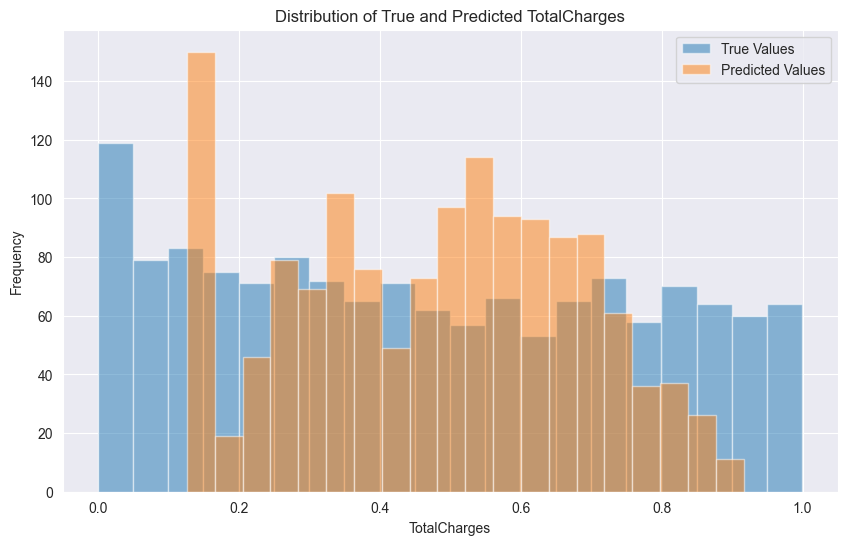

In [486]:

# Histogram of True vs Predicted Values
plt.figure(figsize=(10, 6))
plt.hist(Y_test1, alpha=0.5, label='True Values', bins=20)
plt.hist(y_pred, alpha=0.5, label='Predicted Values', bins=20)
plt.legend()
plt.title('Distribution of True and Predicted TotalCharges')
plt.xlabel('TotalCharges')
plt.ylabel('Frequency')
plt.show()

## Pipeline
### A pipeline is a sequence of data processing components that are applied to the data sequentially. Pipelines are useful for automating and streamlining machine learning workflows, ensuring that data preprocessing steps, feature transformations, and model training occur in a defined order.

In [487]:
#churn_prediction.to_excel('Charges_after_ML.xlsx')


## using pipline for churn detection

In [488]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Define the steps in the pipeline

pipeline = Pipeline([ ('scaler', StandardScaler()), # Step 1: Standardize the data 
 ('pca', PCA(n_components=2)), # Step 2: Apply PCA for dimensionality reduction
 ('classifier', RandomForestClassifier()) # Step 3: Train a Random Forest Classifier
 ]) # Fit the pipeline to the training data 
pipeline.fit(X_train, Y_train) # Predict on the test data

Y_pred = pipeline.predict(X_test) # Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy Score: {accuracy*100:.2f}%")

Accuracy Score: 74.63%


In [489]:
charges_copy['PaymentMethod']=le.inverse_transform(charges_copy['PaymentMethod'])
charges_copy

,MonthlyCharges,TotalCharges,Churn,PaymentMethod
0,0.451042,0.045336,1,Electronic check
1,0.476311,0.049625,0,Electronic check
2,0.510423,0.053301,0,Electronic check
3,0.445357,0.043958,1,Electronic check
4,0.490840,0.050697,1,Electronic check
...,...,...,...,...
7027,0.809223,0.578802,0,Mailed check
7028,0.912192,0.970286,0,Bank transfer (automatic)
7029,0.948831,0.919590,1,Electronic check
7030,0.867340,0.972278,0,Electronic check


In [490]:
# Combine X_test and y_pred into a CSV for future analysis
results = pd.DataFrame({
    'MonthlyCharges': X_test1['MonthlyCharges'],
    'PaymentMethod': X_test1['PaymentMethod'],
    'True_TotalCharges': Y_test1,
    'Predicted_TotalCharges': y_pred
})
results

,MonthlyCharges,PaymentMethod,True_TotalCharges,Predicted_TotalCharges
2476,0.246368,3,0.195283,0.268151
6773,0.845231,2,0.795221,0.688172
6116,0.747315,0,0.791239,0.774087
3047,0.365130,3,0.659519,0.337276
4092,0.120025,0,0.339562,0.408973
...,...,...,...,...
1728,0.599495,2,0.419819,0.545141
5241,0.714466,0,0.923112,0.754967
5456,0.138345,1,0.645888,0.348183
5842,0.047378,0,0.492725,0.366689


In [491]:
results['customerID']=charges['customerID'].head(1407)

In [492]:
charges_copy['PaymentMethod'].value_counts()

PaymentMethod
Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: count, dtype: int64

In [493]:
results['PaymentMethod'].isnull().sum()

0

In [494]:
results['PaymentMethod'].value_counts()

PaymentMethod
2    473
3    331
0    315
1    288
Name: count, dtype: int64

In [495]:
results['PaymentMethod'].dtype

dtype('int32')

In [496]:
results['PaymentMethod']=results['PaymentMethod'].astype(str)
results['PaymentMethod'].dtypes


dtype('O')

In [497]:
label_mapping = {
     "0":"Bank transfer (automatic)",
     "1":"Credit card (automatic)",
     "2":"Electronic check",
    "3": "Mailed check"
}
results['PaymentMethod'] = results['PaymentMethod'].astype(int)
results['PaymentMethod'] = results['PaymentMethod'].replace(0, "Bank transfer (automatic)") 
results['PaymentMethod'] = results['PaymentMethod'].replace(1, "Credit card (automatic)")
results['PaymentMethod'] = results['PaymentMethod'].replace(2, "Electronic check")
results['PaymentMethod'] = results['PaymentMethod'].replace(3, "Mailed check")

In [498]:
results

,MonthlyCharges,PaymentMethod,True_TotalCharges,Predicted_TotalCharges,customerID
2476,0.246368,Mailed check,0.195283,0.268151,NaN
6773,0.845231,Electronic check,0.795221,0.688172,NaN
6116,0.747315,Bank transfer (automatic),0.791239,0.774087,NaN
3047,0.365130,Mailed check,0.659519,0.337276,NaN
4092,0.120025,Bank transfer (automatic),0.339562,0.408973,NaN
...,...,...,...,...,...
1728,0.599495,Electronic check,0.419819,0.545141,NaN
5241,0.714466,Bank transfer (automatic),0.923112,0.754967,NaN
5456,0.138345,Credit card (automatic),0.645888,0.348183,NaN
5842,0.047378,Bank transfer (automatic),0.492725,0.366689,NaN


In [499]:
results['customerID']

2476    NaN
6773    NaN
6116    NaN
3047    NaN
4092    NaN
       ... 
1728    NaN
5241    NaN
5456    NaN
5842    NaN
3977    NaN
Name: customerID, Length: 1407, dtype: object

In [500]:
# Align results with charges based on index and fill NaNs
results['customerID'] = results.index.map(charges['customerID'])

# Print info to check for nulls
results.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1407 entries, 2476 to 3977
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MonthlyCharges          1407 non-null   float64
 1   PaymentMethod           1407 non-null   object 
 2   True_TotalCharges       1407 non-null   float64
 3   Predicted_TotalCharges  1407 non-null   float64
 4   customerID              1407 non-null   object 
dtypes: float64(3), object(2)
memory usage: 66.0+ KB


In [501]:
results['customerID'].isna().sum()

0

In [502]:
results['customerID']

2476    6497-TILVL
6773    7047-FWEYA
6116    2558-BUOZZ
3047    2408-PSJVE
4092    0191-EQUUH
           ...    
1728    4559-UWIHT
5241    3084-DOWLE
5456    3511-BFTJW
5842    7471-WNSUF
3977    7515-LODFU
Name: customerID, Length: 1407, dtype: object

In [503]:
results['PaymentMethod'].isna().sum()

0

In [504]:
#results.to_excel('predictions_vs_actuals.csv', index=False)

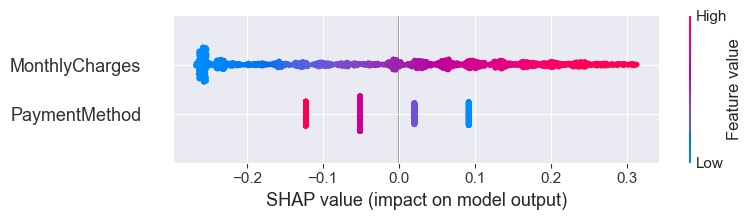

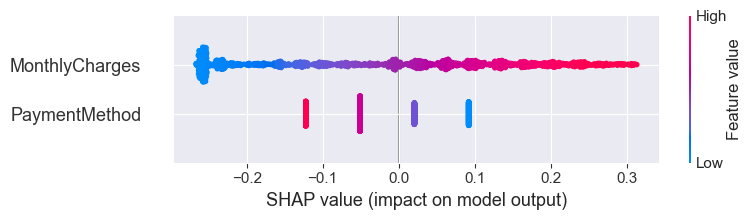

In [505]:
import shap
explainer = shap.Explainer(linear,X_train1)
shap_values = explainer(X_test1)
shap.summary_plot(shap_values, X_test1)
# Summary Plot - Feature Importance
shap.summary_plot(shap_values, X_test1, feature_names=['MonthlyCharges', 'PaymentMethod'])
shap.initjs()
# Force Plot - Individual Prediction Explanation
shap.plots.force(shap_values[1])  # Explains second prediction

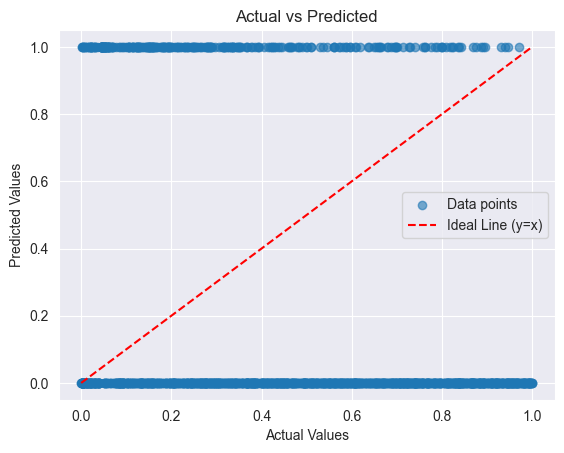

In [506]:

plt.scatter(Y_test1, Y_pred,alpha=0.6,label='Data points')
plt.plot([0,1],[0,1],color='red',linestyle='--', label='Ideal Line (y=x)')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.legend()
plt.show()


In [507]:
churn_prediction

,MonthlyCharges,TotalCharges,PaymentMethod,True_Churn,Predicted_Churn
2476,0.246368,0.195283,Mailed check,No,No
6773,0.845231,0.795221,Electronic check,No,No
6116,0.747315,0.791239,Bank transfer (automatic),No,No
3047,0.365130,0.659519,Mailed check,No,No
4092,0.120025,0.339562,Bank transfer (automatic),No,No
...,...,...,...,...,...
1728,0.599495,0.419819,Electronic check,No,No
5241,0.714466,0.923112,Bank transfer (automatic),No,No
5456,0.138345,0.645888,Credit card (automatic),No,No
5842,0.047378,0.492725,Bank transfer (automatic),No,No


In [508]:
results

,MonthlyCharges,PaymentMethod,True_TotalCharges,Predicted_TotalCharges,customerID
2476,0.246368,Mailed check,0.195283,0.268151,6497-TILVL
6773,0.845231,Electronic check,0.795221,0.688172,7047-FWEYA
6116,0.747315,Bank transfer (automatic),0.791239,0.774087,2558-BUOZZ
3047,0.365130,Mailed check,0.659519,0.337276,2408-PSJVE
4092,0.120025,Bank transfer (automatic),0.339562,0.408973,0191-EQUUH
...,...,...,...,...,...
1728,0.599495,Electronic check,0.419819,0.545141,4559-UWIHT
5241,0.714466,Bank transfer (automatic),0.923112,0.754967,3084-DOWLE
5456,0.138345,Credit card (automatic),0.645888,0.348183,3511-BFTJW
5842,0.047378,Bank transfer (automatic),0.492725,0.366689,7471-WNSUF


## A/B Testing

In [517]:
from sklearn.metrics import recall_score
from scipy.stats import chi2_contingency

# 1. A/B Test 1: Payment Method (Mailed check vs. Others)
group_A=churn_prediction['PaymentMethod']=='Mailed check'
group_B=churn_prediction['PaymentMethod']!='Mailed check'


true_a=churn_prediction['True_Churn'][group_A]=='No'
pred_a=churn_prediction['Predicted_Churn'][group_A]=='No'
recall_a=recall_score(true_a,pred_a)
print(recall_a)

0.9144981412639405


In [520]:
true_b=churn_prediction['True_Churn'][group_B]=='No'
pred_b=churn_prediction['Predicted_Churn'][group_B]=='No'
recall_b=recall_score(true_b,pred_b)
print(recall_b)

0.9126466753585397


In [521]:
churn_a=churn_prediction['True_Churn'][group_A].value_counts().get('Yes',0)
no_churn_a=churn_prediction['True_Churn'][group_A].value_counts().get('No',0)
churn_b=churn_prediction['True_Churn'][group_B].value_counts().get('Yes',0)
no_churn_b=churn_prediction['True_Churn'][group_B].value_counts().get('No',0)
# we used get method to get a no not a boolean value
table=[
    [no_churn_a,churn_a],
    [no_churn_b,churn_b]
]
chi2,p,dof,expected=chi2_contingency(table)
print(f"Chi-square statistics {chi2}")
print(f"p-value {p}")
print(f"expected {expected}")

Chi-square statistics 12.492867567657342
p-value 0.0004085086597669142
dof 1
expected [[243.72139303  87.27860697]
 [792.27860697 283.72139303]]


In [523]:
# Interpret the results
if p < 0.05:
    print("The new payment method had a significant impact on churn.")
else: print("The new payment method did not have a significant impact on churn.")

The new payment method had a significant impact on churn.


In [525]:
churn_rate_a=churn_a/(churn_a+no_churn_a)
churn_rate_b=churn_b/(churn_b+no_churn_b)
print(f"Churn Rate (Mailed check): {churn_rate_a:.2%}")
print(f"Churn Rate (Other methods): {churn_rate_b:.2%}")

difference = churn_rate_b - churn_rate_a
print(f"Difference in Churn Rates: {difference:.2%}")



Churn Rate (Mailed check): 18.73%
Churn Rate (Other methods): 28.72%
Difference in Churn Rates: 9.99%


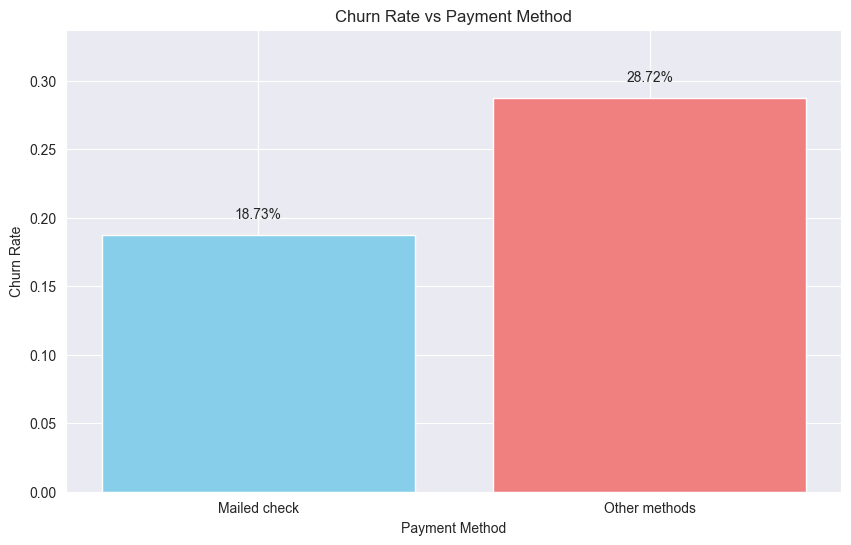

In [537]:
payment_method=['Mailed check','Other methods']
churn_rates=[churn_rate_a,churn_rate_b]
plt.figure(figsize=(10,6))
plt.bar(x=payment_method,height=churn_rates,color=['skyblue', 'lightcoral'])
plt.ylabel('Churn Rate')
plt.xlabel('Payment Method')
plt.title('Churn Rate vs Payment Method')
plt.ylim([0,max(churn_rates)+0.05])
for i,rate in enumerate(churn_rates):
    plt.text(i,rate+0.01,f'{rate:.2%}',ha='center',va='bottom')
plt.show()

In [538]:
import csv
data=[
    {'PaymentMethod':'Mailed check','Churn_Rate':f'{churn_rate_a:.2%}'},
    {'PaymentMethod':'Other methods','Churn_Rate':f'{churn_rate_b:.2%}'},
    {'Metric':'Difference','Value':f'{difference:.2%}'}
]
# CSV file name
filename = 'churn_rate_results.csv'
with open(filename,'w',newline='') as csvfile:
    fieldnames = ['PaymentMethod','Churn_Rate','Metric','Value']
    writer = csv.DictWriter(csvfile,fieldnames=fieldnames)
    writer.writeheader()
    writer.writerows(data)
    

In [565]:
sample_df=customers.sample(1408)
sample_df

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,InternetService,Contract,PaperlessBilling,PaymentMethod
4424,5129-HHMZC,Female,0,Yes,No,Yes,DSL,Two year,No,Credit card (automatic)
2778,8474-UMLNT,Female,0,No,No,Yes,DSL,Month-to-month,No,Bank transfer (automatic)
1082,4652-NNHNY,Male,0,Yes,No,Yes,Fiber optic,Month-to-month,Yes,Bank transfer (automatic)
6791,8961-QDZZJ,Female,0,Yes,Yes,Yes,Fiber optic,One year,Yes,Electronic check
6064,8969-PRHFK,Male,0,No,No,Yes,No,One year,No,Mailed check
...,...,...,...,...,...,...,...,...,...,...
803,2718-GAXQD,Female,1,Yes,Yes,Yes,DSL,Month-to-month,No,Electronic check
6575,5081-NWSUP,Female,0,No,No,Yes,DSL,One year,No,Mailed check
1572,6711-FLDFB,Female,0,No,No,Yes,Fiber optic,Month-to-month,Yes,Electronic check
5886,3572-UUHRS,Male,0,No,No,Yes,No,One year,No,Bank transfer (automatic)


In [566]:
merged_df = pd.concat([sample_df, churn_prediction], axis=1)  # Concatenate if aligned by index

churn_c=merged_df['True_Churn'][merged_df['InternetService']=='Fiber optic'].value_counts().get('Yes',0)
no_churn_c=merged_df['True_Churn'][merged_df['InternetService']=='Fiber optic'].value_counts().get('No',0)
churn_d=merged_df['True_Churn'][merged_df['InternetService']!='Fiber optic'].value_counts().get('Yes',0)
no_churn_d=merged_df['True_Churn'][merged_df['InternetService']!='Fiber optic'].value_counts().get('No',0)

con_table=[
    [no_churn_c,churn_c],
[no_churn_d,churn_d]    
]
chi,p,dof,expected=chi2_contingency(con_table)
print(f"Chi-square statistics {chi}")
print(f"p-value {p}")
print(f"expected {expected}")

Chi-square statistics 30.476966362172334
p-value 3.378541592620285e-08
expected [[ 80.99502488  29.00497512]
 [955.00497512 341.99502488]]


In [568]:
# Interpret the results
if p < 0.05:
    print("The new payment method had a significant impact on churn.")
else:
    print("The new payment method did not have a significant impact on churn.")

The new payment method had a significant impact on churn.


In [569]:
churn_rate_c=churn_c/(churn_c+no_churn_c)
churn_rate_d=churn_d/(churn_d+no_churn_d)
print(f"Churn Rate (Fiber optic): {churn_rate_c:.2%}")
print(f"Churn Rate (not Fiber optic ): {churn_rate_d:.2%}")

difference = churn_rate_c - churn_rate_d
print(f"Difference in Churn Rates: {difference:.2%}")

Churn Rate (Fiber optic): 49.09%
Churn Rate (not Fiber optic ): 24.44%
Difference in Churn Rates: 24.65%


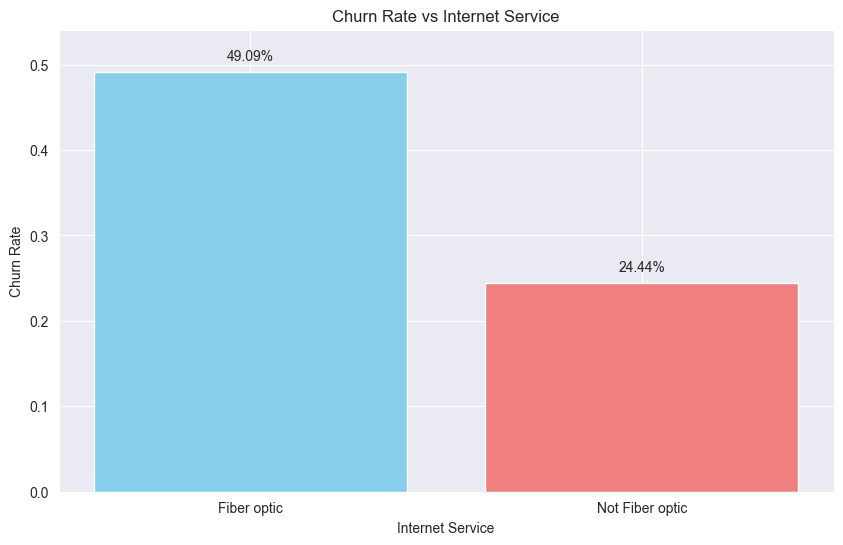

In [570]:
tenures_group3=['Fiber optic','Not Fiber optic']
churn_rates=[churn_rate_c,churn_rate_d]
plt.figure(figsize=(10,6))
plt.bar(x=tenures_group3,height=churn_rates,color=['skyblue', 'lightcoral'])
plt.ylabel('Churn Rate')
plt.xlabel('Internet Service')
plt.title('Churn Rate vs Internet Service')
plt.ylim([0,max(churn_rates)+0.05])
for i,rate in enumerate(churn_rates):
    plt.text(i,rate+0.01,f'{rate:.2%}',ha='center',va='bottom')
plt.show()

In [572]:
data2=[
    {'InternetService':'Fiber optic','Churn_Rate':f'{churn_rate_c:.2%}'},
    {'InternetService':'Not Fiber optic','Churn_Rate':f'{churn_rate_d:.2%}'},
    {'Metric':'Difference','Value':f'{difference:.2%}'}
]
# CSV file name
filename3 = 'churn_rate_InternetService.csv'
with open(filename3,'w',newline='') as csvfile:
    fieldnames = ['InternetService','Churn_Rate','Metric','Value']
    writer = csv.DictWriter(csvfile,fieldnames=fieldnames)
    writer.writeheader()
    writer.writerows(data2)